**Abstact:** 4 methods used to calculate the performance

In [ ]:
#input data samples
import numpy as np
data = np.array([3, 16, 156, 47, 246, 176, 233, 140, 130, 
        101, 166, 201, 200, 116, 118, 247, 
        209, 52, 153, 232, 128, 27, 192, 168, 208, 
        187, 228, 86, 30, 151, 18, 254, 
        76, 112, 67, 244, 179, 150, 89, 49, 83, 147, 90, 
        33, 6, 158, 80, 35, 186, 127], dtype = float)
#data = numpy.loadtxt('input_samples_50k.txt')

# Delay (lag) range that we are interesting in
lags = range(50)

## Python only implementation

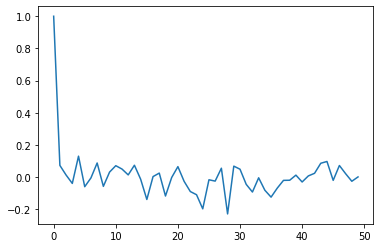

In [44]:
# Pre-allocate autocorrelation table
acorr = len(lags) * [0]

# Mean
mean = sum(data) / len(data) 

# Variance
var = sum([(x - mean)**2 for x in data]) / len(data) 

# Normalized data
ndata = [x - mean for x in data]

# Go through lag components one-by-one
for l in lags:
    c = 1 # Self correlation
    
    if (l > 0):
        tmp = [ndata[l:][i] * ndata[:-l][i] 
               for i in range(len(data) - l)]
        
        c = sum(tmp) / len(data) / var
        
    acorr[l] = c

import matplotlib.pyplot as plt
plt.plot(acorr)

## Statsmodels

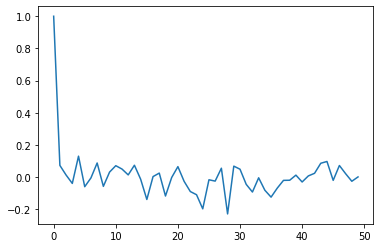

In [43]:
import statsmodels.api as sm
acorr = sm.tsa.acf(data, nlags = len(lags)-1)
plt.plot(acorr)

## numpy correlate

50
[ 1.          0.07326561  0.01341434 -0.03866088  0.13064865 -0.05907283
 -0.00449197  0.08829021 -0.05690311  0.03172606  0.07153035  0.05065747
  0.01430394  0.07437754 -0.01216265 -0.13839977  0.00386119  0.02552057
 -0.11687923 -0.00175199  0.06562094 -0.02561668 -0.08905299 -0.10885074
 -0.1965976  -0.01600149 -0.02426782  0.05580897 -0.22811411  0.06873973
  0.04957915 -0.04449608 -0.09213239 -0.00372904 -0.08097552 -0.12382089
 -0.06773835 -0.01965541 -0.01889643  0.01284286 -0.0297265   0.00796782
  0.02421582  0.08657806  0.09768763 -0.01966484  0.07269079  0.02189144
 -0.02530615  0.00174636]


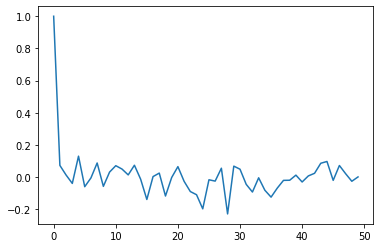

In [40]:
#x = np.array(data) 

# Mean
mean = np.mean(data)

# Variance
var = np.var(data)

# Normalized data
ndata = data - mean

#acorr = np.correlate(ndata, ndata, 'full')[len(data)-1:]
acorr = np.correlate(ndata, ndata, 'full')[len(ndata)-1:]
#acorr /= np.max(acorr) 
acorr = acorr / var / len(ndata)
plt.plot(acorr)

## Fourier transform implementation

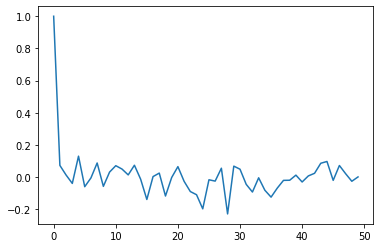

In [45]:
# Nearest size with power of 2
size = 2 ** np.ceil(np.log2(2*len(data) - 1)).astype('int')

# Variance
var = np.var(data)

# Normalized data
ndata = data - np.mean(data)

# Compute the FFT
fft = np.fft.fft(ndata, size)

# Get the power spectrum
pwr = np.abs(fft) ** 2

# Calculate the autocorrelation from inverse FFT of the power spectrum
acorr = np.fft.ifft(pwr).real / var / len(data)
acorr = acorr[:len(data)]
plt.plot(acorr)